In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import cv2

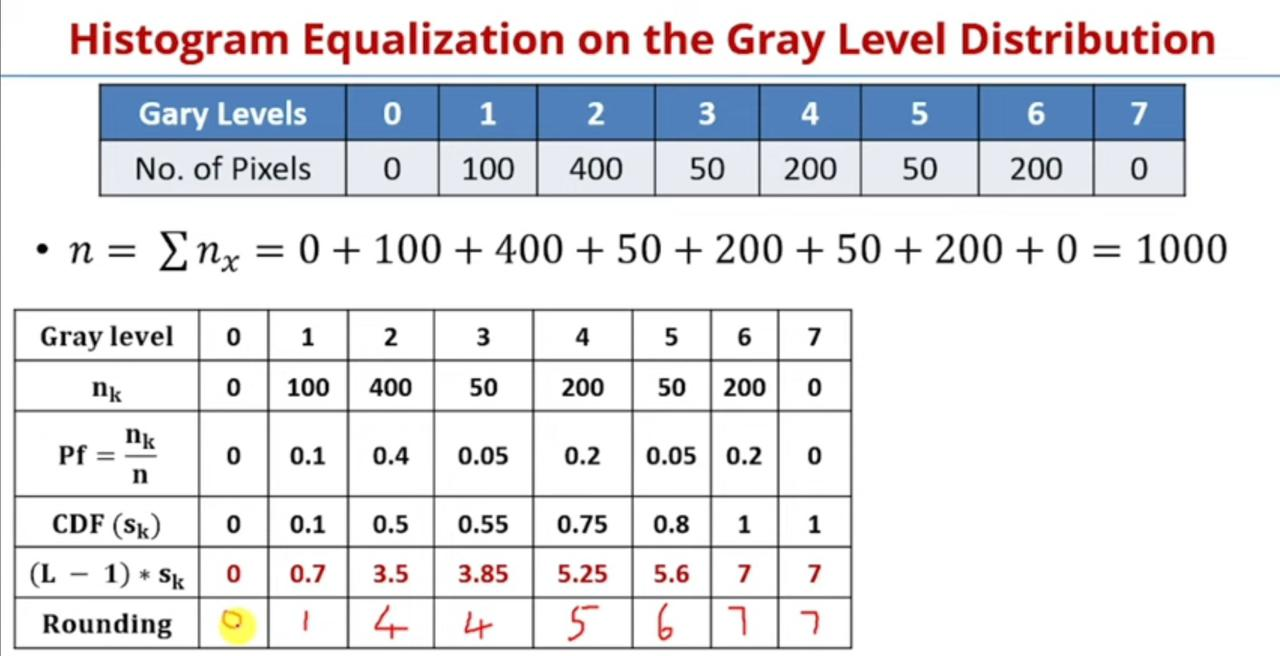

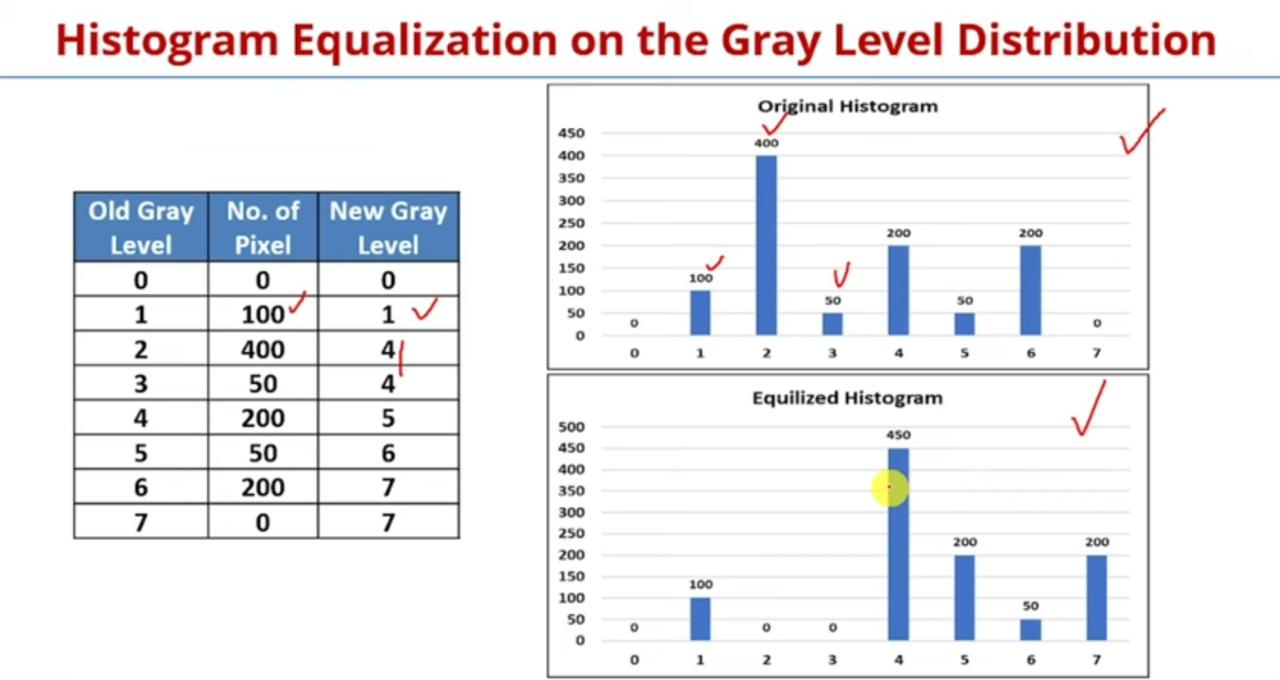

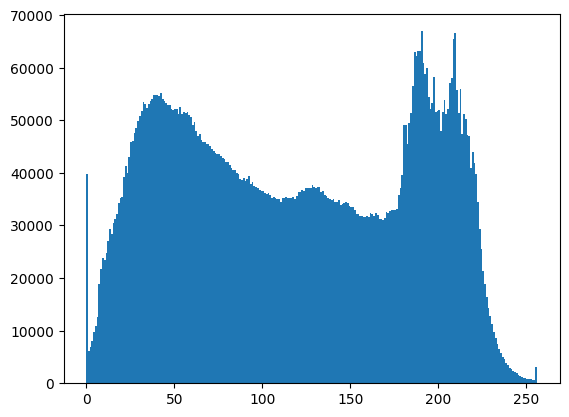

In [3]:


import matplotlib.pyplot as plt
# Load the image from the drive
image_path = '/content/357694371_1328202311117485_5906232642672493183_n.jpg'
image = cv2.imread(image_path)

# Plot the histogram of the image
plt.hist(image.ravel(), 256, [0, 256])
plt.show()




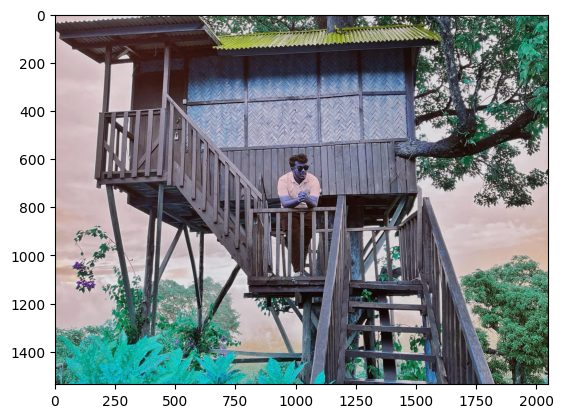

In [4]:
plt.imshow(image)
plt.show()

In [5]:
hist,bins = np.histogram(image.flatten(),256,[0,256])

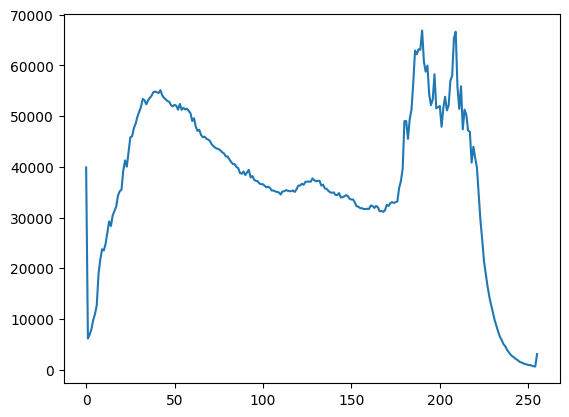

In [6]:
plt.plot(hist)
plt.show()

In [7]:
print(hist.cumsum())

[  39868   45991   52861   60857   70643   81577   94254  113088  134785
  158518  182012  206838  233917  263150  291468  321862  353164  385310
  419627  454816  490319  529579  570841  610880  653885  699724  745754
  793405  841938  891835  942721  994544 1047932 1101062 1153400 1206532
 1260147 1314171 1368903 1423758 1478481 1533058 1588198 1642321 1695946
 1749265 1802243 1855082 1907248 1959186 2011408 2063454 2114732 2167162
 2218418 2270074 2321411 2372891 2423921 2474501 2523554 2573151 2621079
 2668176 2715489 2761747 2807606 2853552 2899100 2944492 2989616 3034074
 3078145 3121916 3165508 3209001 3252218 3295090 3337719 3379752 3421817
 3463300 3504272 3544813 3585342 3625324 3665069 3703850 3742488 3781564
 3819954 3858835 3898244 3936150 3974351 4011808 4049038 4086200 4122907
 4159485 4196043 4232280 4268226 4304301 4340129 4375442 4410773 4445900
 4480962 4515899 4550433 4585566 4620756 4656161 4691442 4726632 4761817
 4797149 4832193 4867760 4904059 4940368 4977015 50

In [8]:
in_arr = np.array([3, 4, 5, 2, 8])
print(in_arr.cumsum())

[ 3  7 12 14 22]


In [9]:
gfg = np.ma.masked_equal([1, 2, 3, 4,3], 2)

print(gfg)
print(np.ma.filled(gfg, 0))

[1 -- 3 4 3]
[1 0 3 4 3]


In [10]:
def eq_hist(hist):
    # We calculate the distributed function
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m -cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    return cdf

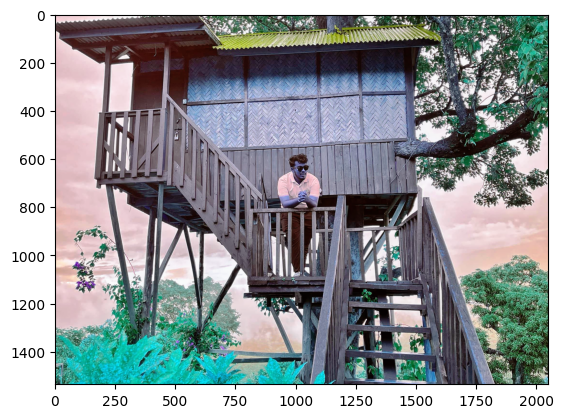

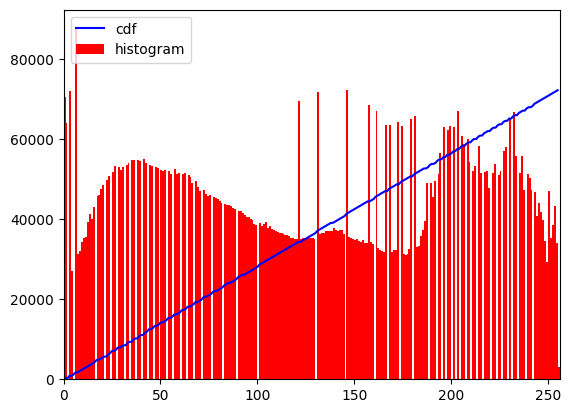

In [11]:
cdf = eq_hist(hist)
img2 = cdf[image]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = eq_hist(hist2)
img3 = cdf2[img2]
cdf_normalized = cdf2 * hist2.max()/ cdf2.max()

plt.figure()
plt.imshow(img3)

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()